In [5]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [6]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: imbalanced_data.csv     
  inflating: raw_data.csv            


In [7]:
import pandas as pd


In [8]:
imbalaced_df = pd.read_csv('/content/imbalanced_data.csv')
imbalaced_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## EDA

In [9]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

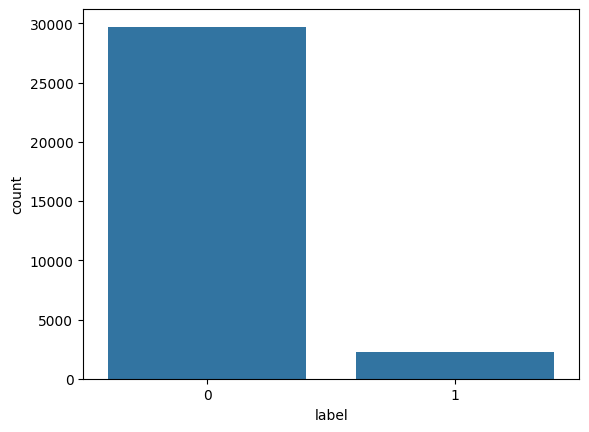

In [10]:
sns.countplot(x='label', data=imbalaced_df)

- 0 ---> No hate
- 1 ---> Hate

In [11]:
imbalaced_df.shape

(31962, 3)

In [12]:
imbalaced_df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [13]:
imbalaced_df.duplicated().sum()

0

In [14]:
imbalaced_df.drop("id", axis=1, inplace=True)

In [15]:
imbalaced_df.head()


,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [16]:
raw_df = pd.read_csv('/content/raw_data.csv')

In [17]:
raw_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [18]:
raw_df.shape

(24783, 7)

In [19]:
raw_df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [20]:
raw_df.duplicated().sum()

0

In [21]:
raw_df.drop(["Unnamed: 0","count","hate_speech","offensive_language","neither"], axis=1, inplace=True)

In [22]:
raw_df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [23]:
raw_df['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

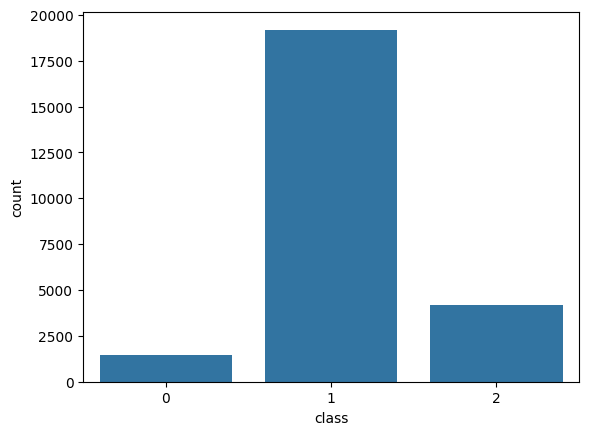

In [24]:
sns.countplot(x='class', data=raw_df)

- class 0 : hate
- class 1 : abusive
- class 2 : no hate/no abusive

In [25]:
raw_df[raw_df['class'] == 0]['class']=1

<ipython-input-25-a25b2e7677d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df[raw_df['class'] == 0]['class']=1


In [26]:
raw_df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [27]:
raw_df['class'].unique()

array([2, 1, 0])

In [28]:
raw_df['class'].replace({0:1}, inplace=True)

In [29]:
raw_df['class'].unique()

array([2, 1])

<Axes: xlabel='class', ylabel='count'>

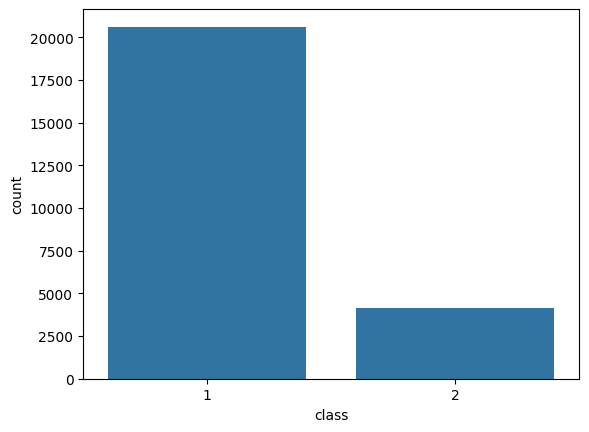

In [30]:
sns.countplot(x='class', data=raw_df)

In [31]:
raw_df['class'].replace({2:0}, inplace=True)

In [32]:
raw_df['class'].unique()

array([0, 1])

<Axes: xlabel='class', ylabel='count'>

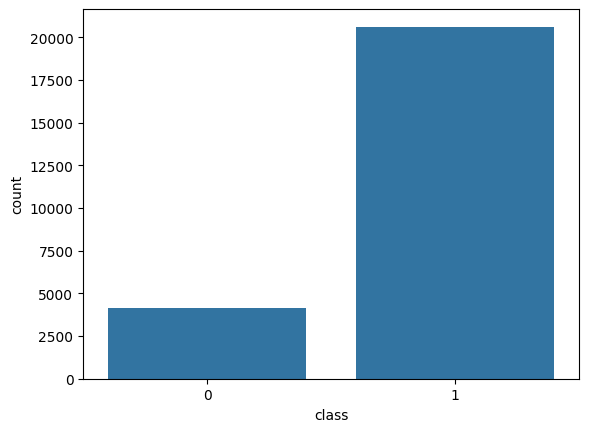

In [33]:
sns.countplot(x='class', data=raw_df)

In [34]:
imbalaced_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [35]:
raw_df.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [36]:
raw_df.rename(columns={'class':'label'}, inplace=True)

In [37]:
raw_df.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [38]:
raw_df = pd.concat([imbalaced_df, raw_df], axis=0)

In [39]:
df=raw_df

In [40]:
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


## Preprocesing


In [47]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [44]:

# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [45]:
df["tweet"][1]

1    @user @user thanks for #lyft credit i can't us...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
Name: tweet, dtype: object

In [48]:

# let's apply the data_cleaning on the data.
df['tweet']=df['tweet'].apply(data_cleaning)

In [49]:
df["tweet"][1]

1    user user thanks for lyft credit i cant use ca...
1     rt  boy dats coldtyga dwn bad for cuffin dat ...
Name: tweet, dtype: object

In [50]:

x = df['tweet']
y = df['label']

In [51]:


from sklearn.model_selection import train_test_split

In [52]:

# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

42558 42558
14187 14187


## Feature engineering

In [53]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [54]:

max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)


In [55]:

sequences_matrix

array([[    0,     0,     0, ...,   207, 13071,  4452],
       [    0,     0,     0, ...,   248,     3,   654],
       [    0,     0,     0, ...,     1,  1832, 41022],
       ...,
       [ 1126,   669,  2785, ...,   187,     1, 33472],
       [    0,     0,     0, ...,   954, 14419,   774],
       [    0,     0,     0, ...,   419,   378,    13]], dtype=int32)

In [56]:

from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop

In [57]:

# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:

model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [59]:
# starting model training
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)

266/266 [==============================] - 428s 2s/step - loss: 0.2799 - accuracy: 0.8898 - val_loss: 0.1710 - val_accuracy: 0.9389


In [60]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [61]:

test_sequences_matrix

array([[   29,  1857,  1260, ...,    13,    11,    29],
       [  471,   192,    31, ...,    16,     3, 17682],
       [    0,     0,     0, ...,   261,   331,  1505],
       ...,
       [    0,     0,     0, ...,    62,    10,   456],
       [    0,     0,     0, ...,     2,     4,     4],
       [    0,     0,     0, ...,     8,    88,  3776]], dtype=int32)

In [62]:

# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

444/444 [==============================] - 64s 143ms/step - loss: 0.1829 - accuracy: 0.9311


In [63]:
lstm_prediction = model.predict(test_sequences_matrix)

444/444 [==============================] - 51s 113ms/step


In [64]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
print(confusion_matrix(y_test,res))

[[8156  297]
 [ 680 5054]]


In [67]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [68]:
# Let's save the mdoel.
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
import keras

In [70]:
load_model=keras.models.load_model("model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)


In [72]:
# Let's test our model on custom data.
test = 'i love this movie'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")


i love this movie
i love this movie
['love movi']
[[28, 5906]]
1/1 [==============================] - 0s 335ms/step
pred [[0.23660225]]
no hate
